# An Abalone is type of moousk or sea snail. The purpose of this exercise is to 
TRY to Predict the number of RINGS on the snail as the fuction of
Other Variables

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [111]:
# import the file

df_ab= pd.read_csv("./abalone.data")

In [40]:
df_ab.head(5)

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


# 1. convert the rings into your Y array as follows, 
if the value is less than or equal to 8, assign to class 0; if the value is equal to 9 or 10, assign to class 1 and otherwise, assign to class 2

In [41]:
y_columns=['0.455','0.365','0.095','0.514','0.2245','0.101','0.15', '15']

In [42]:
Y= df_ab.drop(columns=['M'])

# iterate through each RING columns

for i in range(0, len(y_columns)):
    Y[y_columns[i]]= Y[y_columns[i]].apply(lambda x: 0 if x <= 8 else (1 if x == 9 or x == 10 else 2))


In [43]:
Y['15'].unique()

array([0, 1, 2], dtype=int64)

In [51]:
# b. use 1-hot encoding on the column gender

df_ab["M"]= pd.get_dummies(df_ab["M"])
X= np.array(df_ab["M"])
X[:4]

array([1, 0, 1, 1], dtype=uint8)

In [53]:
Y= np.array(Y)
Y[:5]

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

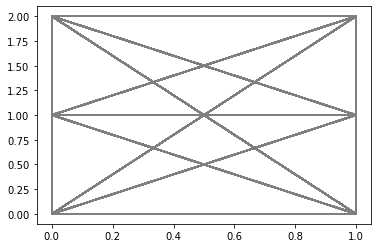

In [71]:
plt.plot(X,Y)

In [67]:
# use QDA with quadratic boundary by fitting the class conditional densitites to data using BAYES rule

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [ ]:
qda= QDA()



In [72]:
# standardizing the values

#from sklearn.preprocessing import MinMaxScaler

#scaler= MinMaxScaler()
#x_scaled= scaler.fit_transform(X)

# c. You should convert the data to the highest principal components

In [48]:
from sklearn.decomposition import PCA

In [97]:
pca= PCA(n_components= 3)
#X= X.reshape(-1,1)

In [102]:
p_comp= pca.fit_transform(Y)

#PCA1, PCA2, PCA3= 
PCA1= p_comp

In [105]:
# use x afrom the PCA
x_pca= PCA1
x_pca= np.array(x_pca)

# d. calculate the erros using 10 -fold validation on KNN and QDA

In [106]:
from sklearn.neighbors import KNeighborsClassifier as KN
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [107]:

xtrain, xtest, ytrain, ytest= train_test_split(x_pca,Y)

knn= KN(n_neighbors= 5)

In [109]:
knn.fit(xtrain, ytrain)

ypredict= knn.predict( xtest)
KNNscores= cross_val_score(knn, x_pca, Y)

ValueError: multiclass-multioutput is not supported